#The Sparks Foundation - Data Science and Business Analytics Internship

# BY - SOHAM SHAH

#----------------------------------------------------------------------

## Task no. 3 - Exploratory Data Analysis 

Problem Statement -  Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’ & As a business manager, try to find out the weak areas where you can work to make more profit

#### TECHNICAL STACK AND LIBRARIES - NUMPY, PANDAS, MATPLOTLIB, SEABORN





Step 1 - Importing Libraries


In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

Step 2 - Importing the Data AND Visualizing the dataframe.

In [61]:
df = pd.read_csv('/content/SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164



Step 3 - Exploratory Data Analysis

In [62]:
#Checking for Null values if there are any.
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


Step 4 - Finding and Removing the null and duplicate values from Dataset.

In [63]:
# Checking for duplicate values
print(df.duplicated().sum())
# Removing duplicate values
df.drop_duplicates(subset=None, keep='first', inplace=True)

17


In [64]:
#finding the correlation between the features
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


Here the correlation is done only 5 columns because the remaining columns has non numerical values.

Step 5 - Visualization

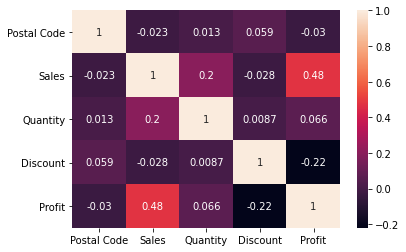

In [65]:
#visualizing the correlation between the features
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

## [ SHIP-MODES ]

In [66]:
df['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

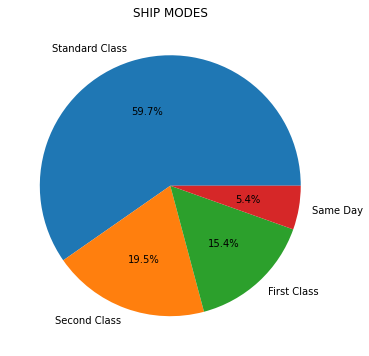

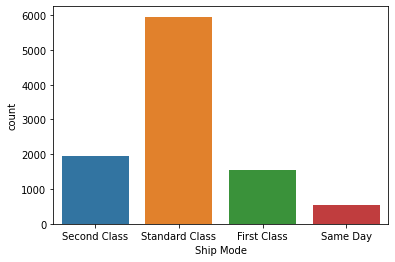

In [67]:
plt.figure(figsize=(6,6))
plt.title('SHIP MODES')
plt.pie(df['Ship Mode'].value_counts(), labels=df['Ship Mode'].value_counts().index, autopct= '%1.1f%%')
plt.show()
sns.countplot(x=df['Ship Mode'])

## [ SEGMENT ]

In [68]:
df['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

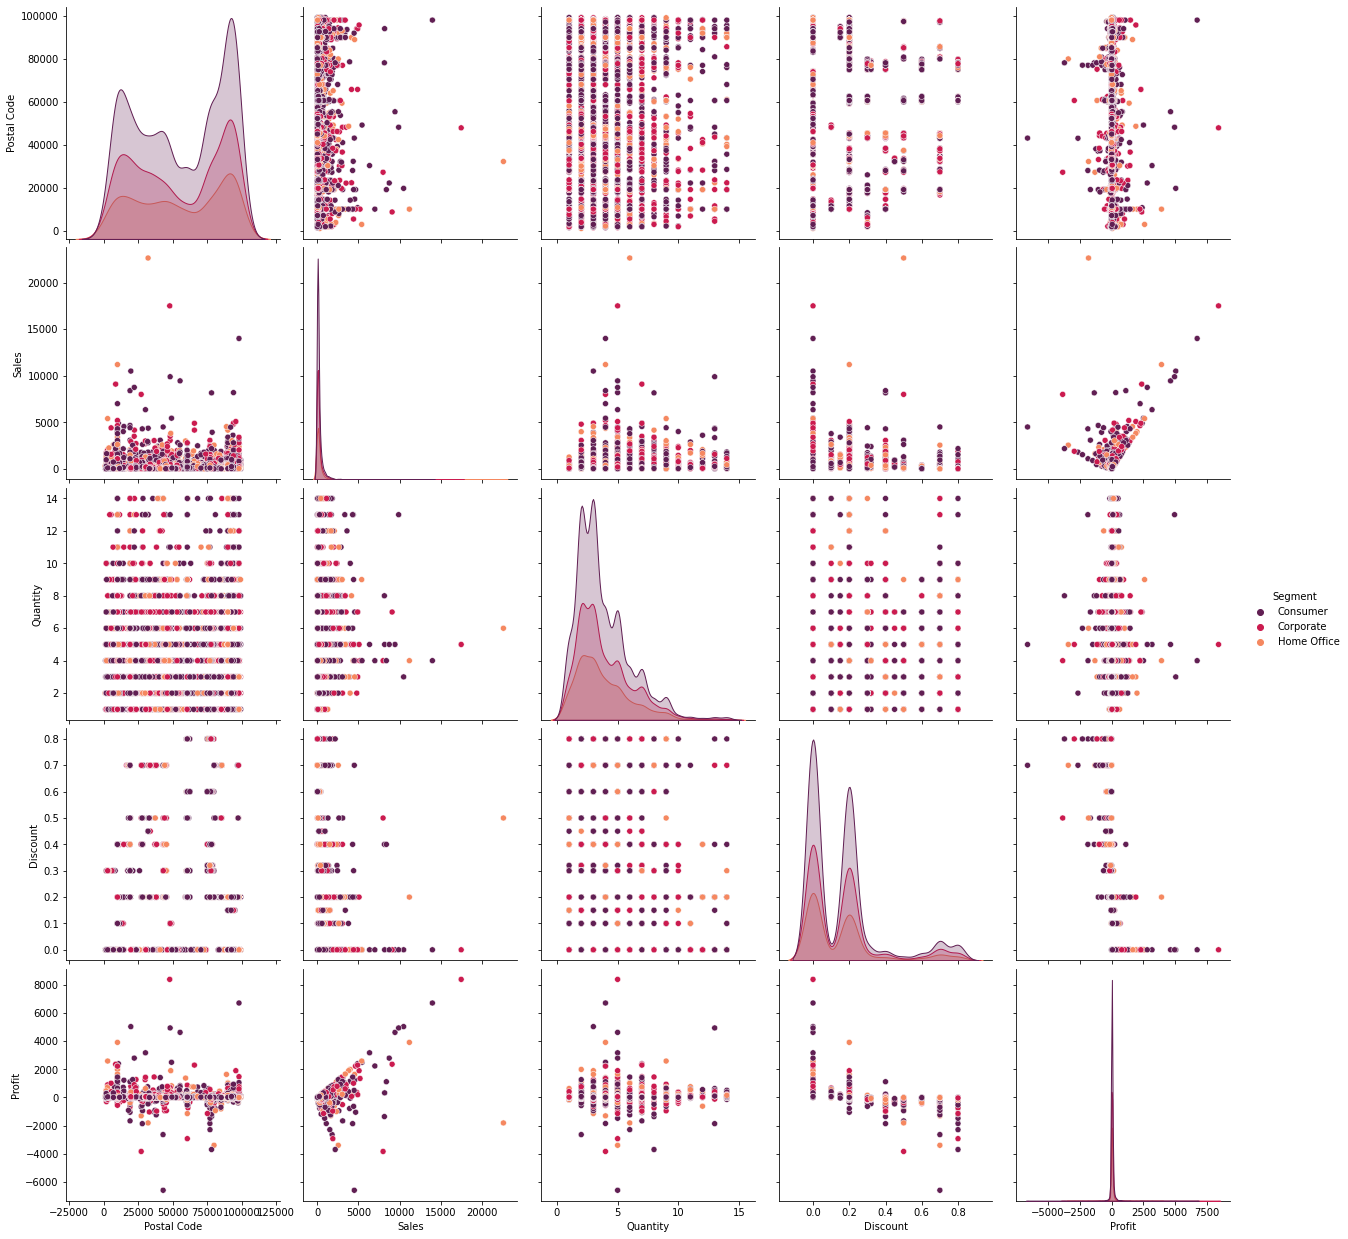

In [69]:
#Corelationship between different features.
sns.pairplot(df, hue = 'Segment', palette= 'rocket', height=3.5)
plt.show()

## [ REGION ]

In [70]:
df['Region'].value_counts()

West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64

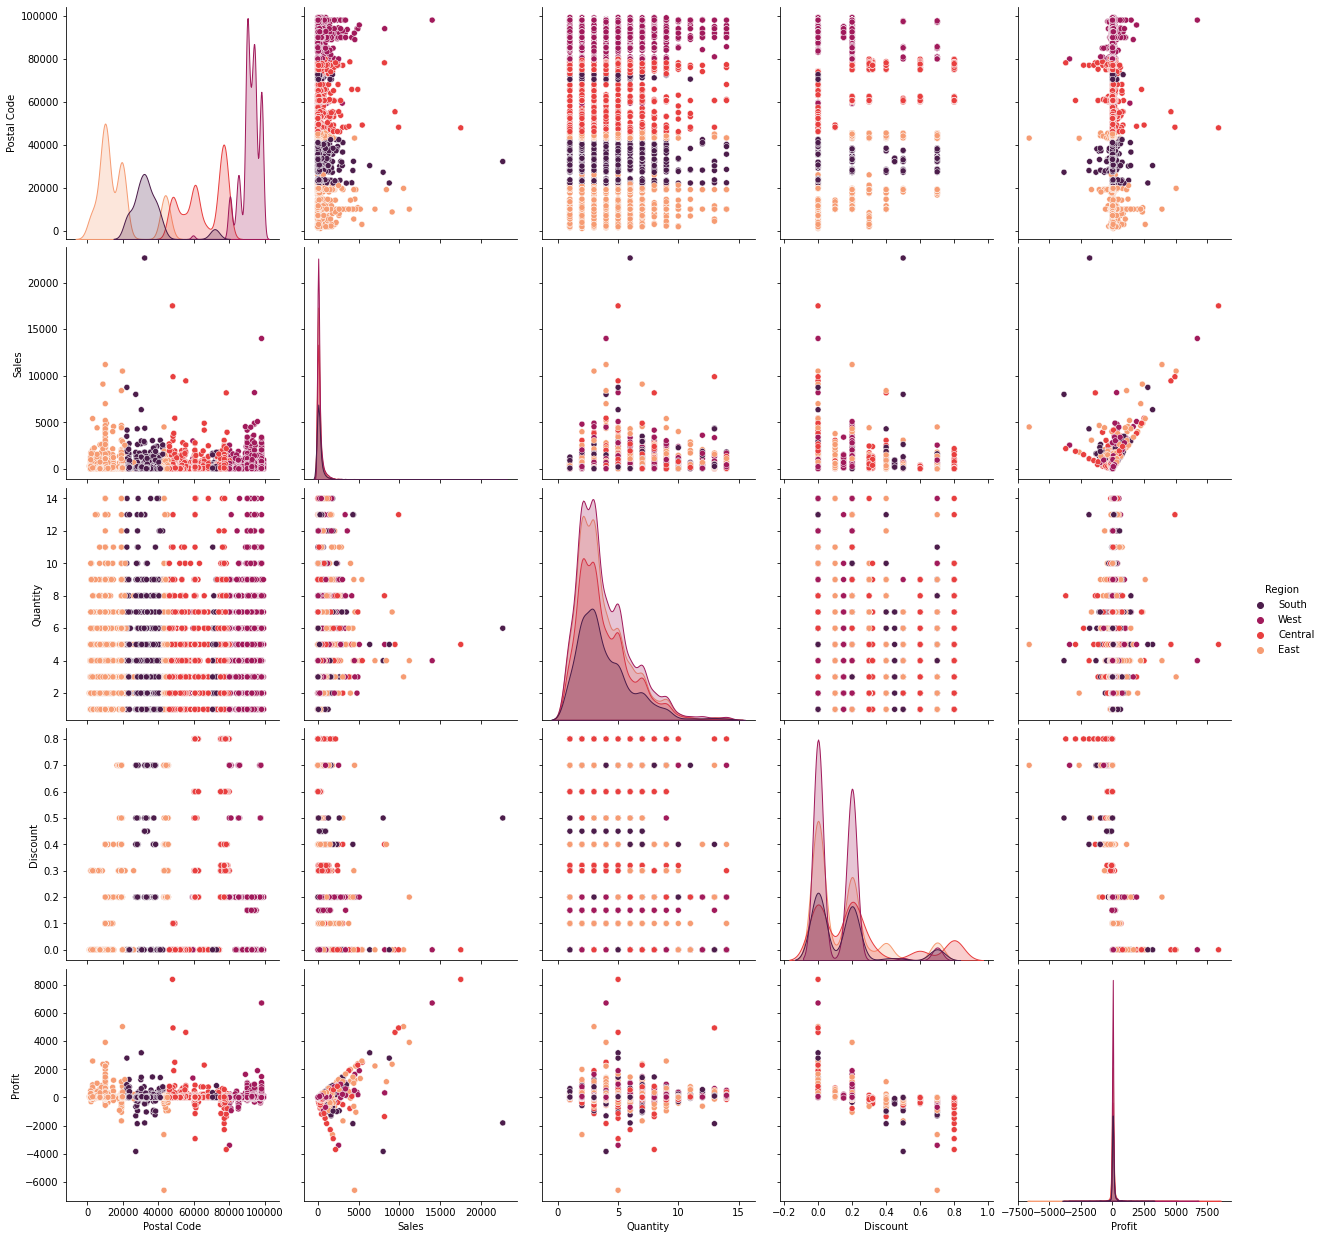

In [71]:
#Corelationship between different features.
sns.pairplot(df, hue = 'Region', palette= 'rocket', height=3.5)
plt.show()

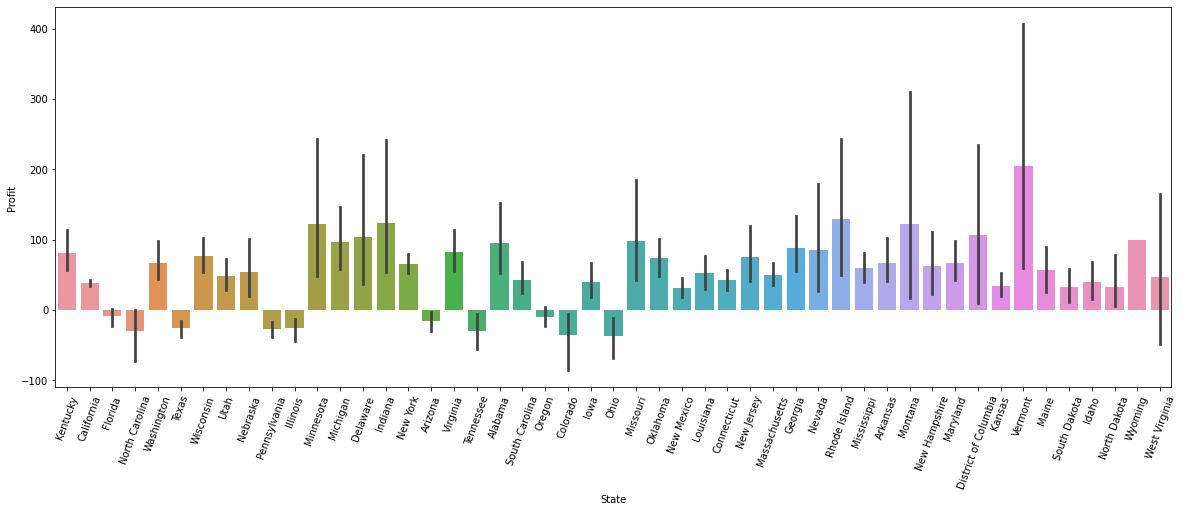

In [72]:
#State wise graph 
plt.figure(figsize=(20,7))
sns.barplot(x=df['State'], y=df["Profit"])
plt.xticks(rotation=70)
plt.show()

Graph Displays that California and New York have the highest profits while Texas and Ohio have the least profits.


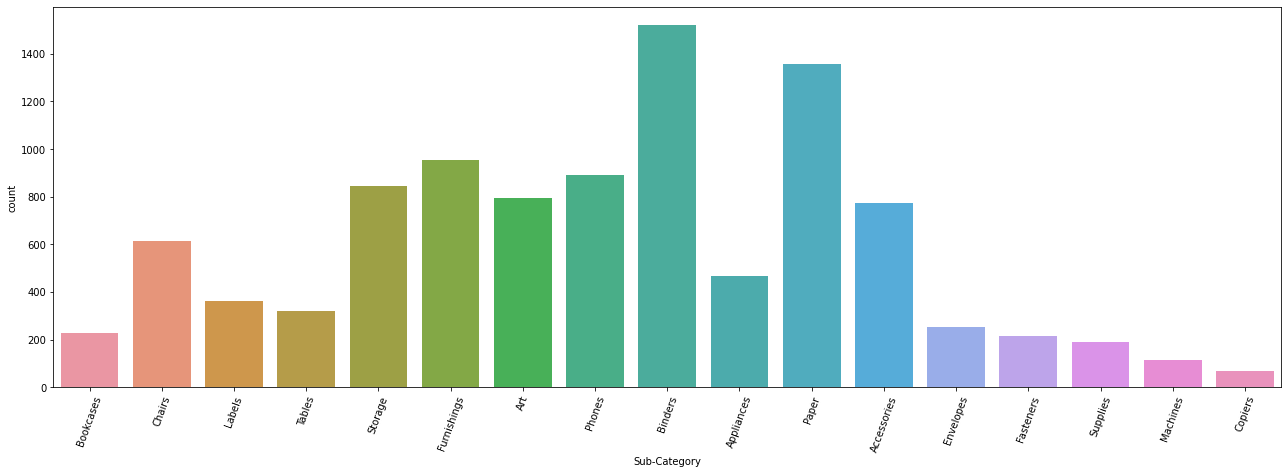

In [73]:
#Sub-Category wise graph
plt.figure(figsize=(22,7))
sns.countplot(x=df['Sub-Category'])
plt.xticks(rotation=70)
plt.show()

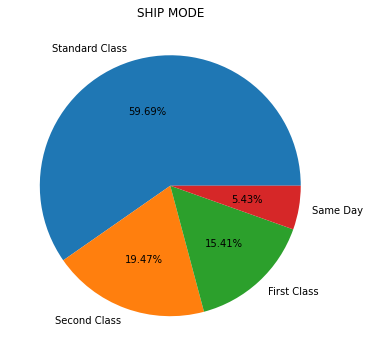

In [74]:
#Pie Chart for Share of different mode used for delivery
plt.figure(figsize = (6,6))
plt.title('SHIP MODE')
plt.pie(df['Ship Mode'].value_counts(), labels=df['Ship Mode'].value_counts().index, autopct = '%1.2f%%')
plt.show()

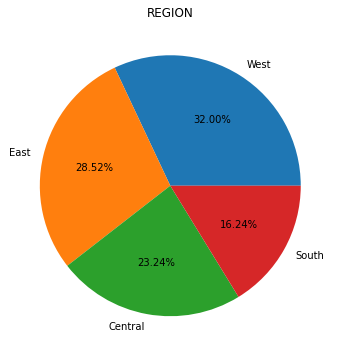

In [75]:
#Pie Chart for Share of sales in different Region
plt.figure(figsize = (6,6))
plt.title('REGION')
plt.pie(df['Region'].value_counts(), labels=df['Region'].value_counts().index, autopct = '%1.2f%%')
plt.show()

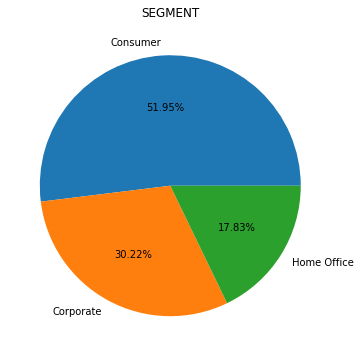

In [76]:
#Pie Chart for Share of different segments
plt.figure(figsize = (6,6))
plt.title('SEGMENT')
plt.pie(df['Segment'].value_counts(), labels=df['Segment'].value_counts().index, autopct = '%1.2f%%')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


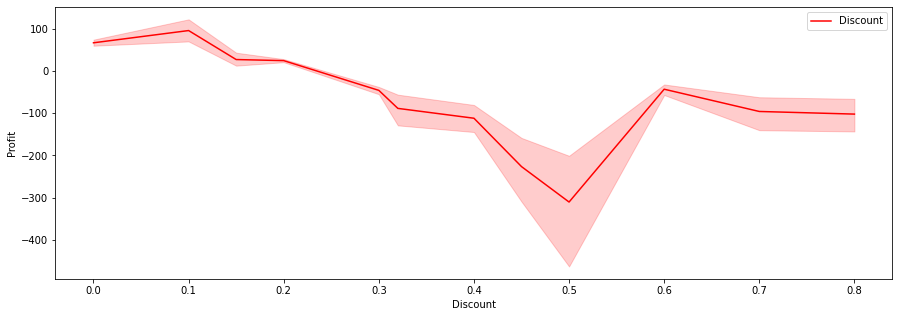

In [77]:
#Plot for Discount Vs Profit
plt.figure(figsize=(15,5))
sns.lineplot('Discount', 'Profit', data=df, color ='r', label='Discount')
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


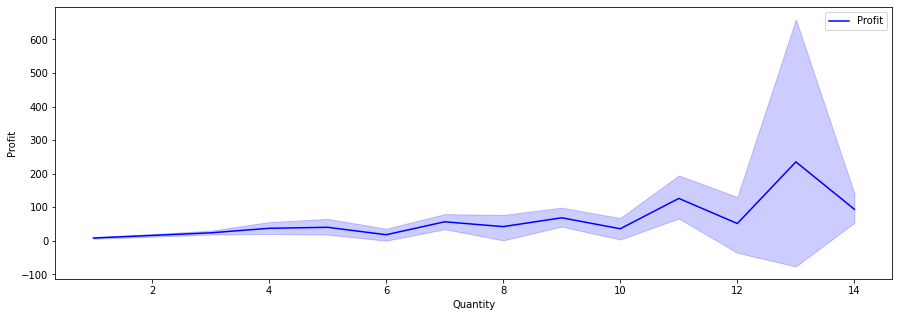

In [78]:
#Plot for Quantity Vs Profit
plt.figure(figsize=(15,5))
sns.lineplot('Quantity', 'Profit', data=df, color ='b', label='Profit')
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


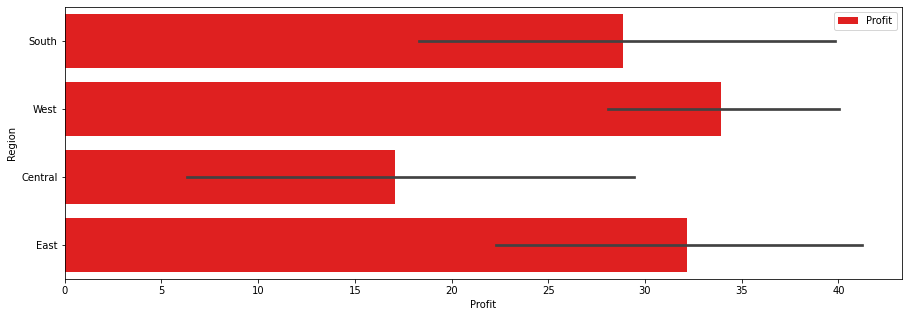

In [79]:
#Plot for Profit Vs Region
plt.figure(figsize=(15,5))
sns.barplot('Profit', 'Region', data=df, color ='r', label='Profit')
plt.legend()

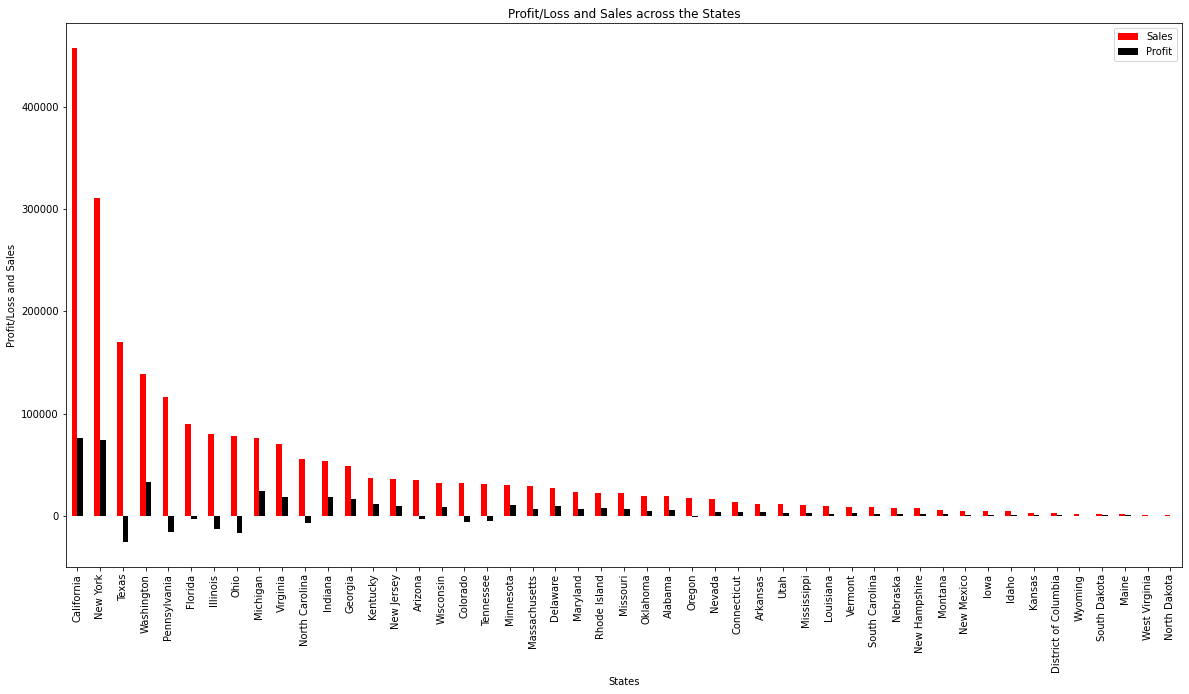

In [80]:
pls=df.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
pls[:].plot.bar(color=['red','black'],figsize=(20,10))
plt.title('Profit/Loss and Sales across the States')
plt.xlabel('States')
plt.ylabel('Profit/Loss and Sales')
plt.show()

# CONCLUSION FROM ABOVE ANALYSIS.

1.   Work more on california and New York as they are places of Maximum sales

1.   Decrease Discounts in Southern Region to increase sales

3.   Reduce sales of furniture as it has very less profit compared to sales.

4.   The Profit generated by office supplies category is more, but the sales for office suppliers are less. So, we have to work on increasing the sales for office supplies category.

5. Profits are not significant and a different stratergy should be thought upon 


## SOME FACTS :

*   California recorded the most number of sales.
*   Binders were most sold in sub Categories.
*   Discount and Profit seemed in inverse corelation.
*   Standard Class is most prefered ship mode.
*   Central region record the good sales but still not the best in terms of profit Consumer dominated in segment.

















